# 1- Cleaning, processing and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('medical_students_CSO.csv')

In [3]:
df.head(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C04148V04915,Graduates,UNIT,VALUE
0,HSPAM115C01,Number of Medical Graduates,2014,2014,-,All medical graduates,Number,4841.0
1,HSPAM115C01,Number of Medical Graduates,2014,2014,10,Medicine graduates,Number,1585.0
2,HSPAM115C01,Number of Medical Graduates,2014,2014,20,Nursing and Midwifery graduates,Number,2767.0
3,HSPAM115C01,Number of Medical Graduates,2014,2014,30,Pharmaceutical graduates,Number,489.0
4,HSPAM115C01,Number of Medical Graduates,2015,2015,-,All medical graduates,Number,4916.0
5,HSPAM115C01,Number of Medical Graduates,2015,2015,10,Medicine graduates,Number,1677.0
6,HSPAM115C01,Number of Medical Graduates,2015,2015,20,Nursing and Midwifery graduates,Number,2774.0
7,HSPAM115C01,Number of Medical Graduates,2015,2015,30,Pharmaceutical graduates,Number,465.0
8,HSPAM115C01,Number of Medical Graduates,2016,2016,-,All medical graduates,Number,5544.0
9,HSPAM115C01,Number of Medical Graduates,2016,2016,10,Medicine graduates,Number,1884.0


In [4]:
# Here, I had to create a Boolean mask to identify all 'Ratio' from the variable graduate
# since they are the sum up of all other values and this would interfer in the acuracy of the analysis.
mask = df['UNIT']== 'Ratio'

In [5]:
df.drop(df[mask].index, inplace=True)

In [6]:
df.tail(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C04148V04915,Graduates,UNIT,VALUE
22,HSPAM115C01,Number of Medical Graduates,2019,2019,20,Nursing and Midwifery graduates,Number,3631.0
23,HSPAM115C01,Number of Medical Graduates,2019,2019,30,Pharmaceutical graduates,Number,558.0
24,HSPAM115C01,Number of Medical Graduates,2020,2020,-,All medical graduates,Number,6264.0
25,HSPAM115C01,Number of Medical Graduates,2020,2020,10,Medicine graduates,Number,1947.0
26,HSPAM115C01,Number of Medical Graduates,2020,2020,20,Nursing and Midwifery graduates,Number,3742.0
27,HSPAM115C01,Number of Medical Graduates,2020,2020,30,Pharmaceutical graduates,Number,575.0
28,HSPAM115C01,Number of Medical Graduates,2021,2021,-,All medical graduates,Number,7172.0
29,HSPAM115C01,Number of Medical Graduates,2021,2021,10,Medicine graduates,Number,2244.0
30,HSPAM115C01,Number of Medical Graduates,2021,2021,20,Nursing and Midwifery graduates,Number,4273.0
31,HSPAM115C01,Number of Medical Graduates,2021,2021,30,Pharmaceutical graduates,Number,655.0


In [7]:
# Here, I had to create a Boolean mask to identify all 'All medical graduates' from the variable graduate
# since they are the sum up of all other values and this would interfer in the analysis.

mask = df['Graduates']== 'All medical graduates'

In [8]:
df.drop(df[mask].index, inplace=True)

In [9]:
df.head(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C04148V04915,Graduates,UNIT,VALUE
1,HSPAM115C01,Number of Medical Graduates,2014,2014,10,Medicine graduates,Number,1585.0
2,HSPAM115C01,Number of Medical Graduates,2014,2014,20,Nursing and Midwifery graduates,Number,2767.0
3,HSPAM115C01,Number of Medical Graduates,2014,2014,30,Pharmaceutical graduates,Number,489.0
5,HSPAM115C01,Number of Medical Graduates,2015,2015,10,Medicine graduates,Number,1677.0
6,HSPAM115C01,Number of Medical Graduates,2015,2015,20,Nursing and Midwifery graduates,Number,2774.0
7,HSPAM115C01,Number of Medical Graduates,2015,2015,30,Pharmaceutical graduates,Number,465.0
9,HSPAM115C01,Number of Medical Graduates,2016,2016,10,Medicine graduates,Number,1884.0
10,HSPAM115C01,Number of Medical Graduates,2016,2016,20,Nursing and Midwifery graduates,Number,3105.0
11,HSPAM115C01,Number of Medical Graduates,2016,2016,30,Pharmaceutical graduates,Number,555.0
13,HSPAM115C01,Number of Medical Graduates,2017,2017,10,Medicine graduates,Number,1880.0


In [10]:
# Here, I dropped columns belinging to the years of 2014 and 2015, since my analysis is going to be from
# 2016 on.#
df = df.drop([1, 2, 3, 5, 6, 7])

In [11]:
df.head(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C04148V04915,Graduates,UNIT,VALUE
9,HSPAM115C01,Number of Medical Graduates,2016,2016,10,Medicine graduates,Number,1884.0
10,HSPAM115C01,Number of Medical Graduates,2016,2016,20,Nursing and Midwifery graduates,Number,3105.0
11,HSPAM115C01,Number of Medical Graduates,2016,2016,30,Pharmaceutical graduates,Number,555.0
13,HSPAM115C01,Number of Medical Graduates,2017,2017,10,Medicine graduates,Number,1880.0
14,HSPAM115C01,Number of Medical Graduates,2017,2017,20,Nursing and Midwifery graduates,Number,3012.0
15,HSPAM115C01,Number of Medical Graduates,2017,2017,30,Pharmaceutical graduates,Number,547.0
17,HSPAM115C01,Number of Medical Graduates,2018,2018,10,Medicine graduates,Number,1909.0
18,HSPAM115C01,Number of Medical Graduates,2018,2018,20,Nursing and Midwifery graduates,Number,3418.0
19,HSPAM115C01,Number of Medical Graduates,2018,2018,30,Pharmaceutical graduates,Number,592.0
21,HSPAM115C01,Number of Medical Graduates,2019,2019,10,Medicine graduates,Number,2025.0


In [12]:
#Reset index. I used the drop parameter to avoid the old index being added as a column.
#(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
df =df.reset_index(drop=True)

In [13]:
df.head(10)

,STATISTIC,Statistic Label,TLIST(A1),Year,C04148V04915,Graduates,UNIT,VALUE
0,HSPAM115C01,Number of Medical Graduates,2016,2016,10,Medicine graduates,Number,1884.0
1,HSPAM115C01,Number of Medical Graduates,2016,2016,20,Nursing and Midwifery graduates,Number,3105.0
2,HSPAM115C01,Number of Medical Graduates,2016,2016,30,Pharmaceutical graduates,Number,555.0
3,HSPAM115C01,Number of Medical Graduates,2017,2017,10,Medicine graduates,Number,1880.0
4,HSPAM115C01,Number of Medical Graduates,2017,2017,20,Nursing and Midwifery graduates,Number,3012.0
5,HSPAM115C01,Number of Medical Graduates,2017,2017,30,Pharmaceutical graduates,Number,547.0
6,HSPAM115C01,Number of Medical Graduates,2018,2018,10,Medicine graduates,Number,1909.0
7,HSPAM115C01,Number of Medical Graduates,2018,2018,20,Nursing and Midwifery graduates,Number,3418.0
8,HSPAM115C01,Number of Medical Graduates,2018,2018,30,Pharmaceutical graduates,Number,592.0
9,HSPAM115C01,Number of Medical Graduates,2019,2019,10,Medicine graduates,Number,2025.0


In [14]:
# Droping unecessary or redundant columns. 'TList(A1)' is redunt as well as 'STATISTIC' and 'Statistic Label'
# apply to the whole table.
df = df.drop(columns = ['STATISTIC', 'Statistic Label', 'C04148V04915','UNIT','TLIST(A1)'])

In [15]:
df.head(10)

,Year,Graduates,VALUE
0,2016,Medicine graduates,1884.0
1,2016,Nursing and Midwifery graduates,3105.0
2,2016,Pharmaceutical graduates,555.0
3,2017,Medicine graduates,1880.0
4,2017,Nursing and Midwifery graduates,3012.0
5,2017,Pharmaceutical graduates,547.0
6,2018,Medicine graduates,1909.0
7,2018,Nursing and Midwifery graduates,3418.0
8,2018,Pharmaceutical graduates,592.0
9,2019,Medicine graduates,2025.0


In [16]:
df

,Year,Graduates,VALUE
0,2016,Medicine graduates,1884.0
1,2016,Nursing and Midwifery graduates,3105.0
2,2016,Pharmaceutical graduates,555.0
3,2017,Medicine graduates,1880.0
4,2017,Nursing and Midwifery graduates,3012.0
5,2017,Pharmaceutical graduates,547.0
6,2018,Medicine graduates,1909.0
7,2018,Nursing and Midwifery graduates,3418.0
8,2018,Pharmaceutical graduates,592.0
9,2019,Medicine graduates,2025.0


In [17]:
# Renaming some columns for better vizualization.
df.rename(columns={'VALUE': 'Number of graduates','Graduates': 'Degree' }, inplace=True)

In [18]:
df.head(10)

,Year,Degree,Number of graduates
0,2016,Medicine graduates,1884.0
1,2016,Nursing and Midwifery graduates,3105.0
2,2016,Pharmaceutical graduates,555.0
3,2017,Medicine graduates,1880.0
4,2017,Nursing and Midwifery graduates,3012.0
5,2017,Pharmaceutical graduates,547.0
6,2018,Medicine graduates,1909.0
7,2018,Nursing and Midwifery graduates,3418.0
8,2018,Pharmaceutical graduates,592.0
9,2019,Medicine graduates,2025.0


In [19]:
# Changing the values in the 'Degree' column.
df['Degree'] = df['Degree'].replace({'Medicine graduates': 'Medicine', 'Nursing and Midwifery graduates': 'Nursing and Midwifery', 'Pharmaceutical graduates':'Pharmacy'})

In [20]:
df.head(10)

,Year,Degree,Number of graduates
0,2016,Medicine,1884.0
1,2016,Nursing and Midwifery,3105.0
2,2016,Pharmacy,555.0
3,2017,Medicine,1880.0
4,2017,Nursing and Midwifery,3012.0
5,2017,Pharmacy,547.0
6,2018,Medicine,1909.0
7,2018,Nursing and Midwifery,3418.0
8,2018,Pharmacy,592.0
9,2019,Medicine,2025.0


In [21]:
df.dtypes

Year                     int64
Degree                  object
Number of graduates    float64
dtype: object

In [22]:
# Here I changed the type of the column 'Number of graduates' from float to interger, since the number of
# students is a discrete variable.

df['Number of graduates']=df['Number of graduates'].astype('int')

In [23]:
df.head(5)

,Year,Degree,Number of graduates
0,2016,Medicine,1884
1,2016,Nursing and Midwifery,3105
2,2016,Pharmacy,555
3,2017,Medicine,1880
4,2017,Nursing and Midwifery,3012


In [24]:
# Checked for null cells.
print(df.isnull().sum())

Year                   0
Degree                 0
Number of graduates    0
dtype: int64


In [25]:
df.head(10)

,Year,Degree,Number of graduates
0,2016,Medicine,1884
1,2016,Nursing and Midwifery,3105
2,2016,Pharmacy,555
3,2017,Medicine,1880
4,2017,Nursing and Midwifery,3012
5,2017,Pharmacy,547
6,2018,Medicine,1909
7,2018,Nursing and Midwifery,3418
8,2018,Pharmacy,592
9,2019,Medicine,2025


In [26]:
df

,Year,Degree,Number of graduates
0,2016,Medicine,1884
1,2016,Nursing and Midwifery,3105
2,2016,Pharmacy,555
3,2017,Medicine,1880
4,2017,Nursing and Midwifery,3012
5,2017,Pharmacy,547
6,2018,Medicine,1909
7,2018,Nursing and Midwifery,3418
8,2018,Pharmacy,592
9,2019,Medicine,2025


In [27]:
df2 = pd.read_csv('medical_graduates_HEA - Male_Female.csv')

In [28]:
df2.head(10)

,Year_conclusion,Course,Male_enrolled,Female_enrolled,N_Enrolled_M+F,Male_graduates,Female_graduates,N_Graduates_M+F
0,2016,Medicine,3755,4570,8325,810,1075,1885
1,2016,Nursing and Midwifery,1005,8655,9660,285,2820,3105
2,2016,Pharmacy,470,1060,1530,150,405,555
3,2017,Medicine,3780,4715,8495,860,1020,1880
4,2017,Nursing and Midwifery,1020,9335,10355,265,2745,3010
5,2017,Pharmacy,440,1050,1490,165,380,545
6,2018,Medicine,3730,4760,8490,890,1020,1910
7,2018,Nursing and Midwifery,1035,9640,10675,310,3105,3415
8,2018,Pharmacy,410,1115,1525,165,425,590
9,2019,Medicine,3840,4870,8710,915,1110,2025


In [29]:
# I decided to concatenate table here instead of merging so I can have a better vizualisation of them.
df3 = pd.concat([df, df2], axis=1)

In [30]:
df3.head(10)

,Year,Degree,Number of graduates,Year_conclusion,Course,Male_enrolled,Female_enrolled,N_Enrolled_M+F,Male_graduates,Female_graduates,N_Graduates_M+F
0,2016.0,Medicine,1884.0,2016,Medicine,3755,4570,8325,810,1075,1885
1,2016.0,Nursing and Midwifery,3105.0,2016,Nursing and Midwifery,1005,8655,9660,285,2820,3105
2,2016.0,Pharmacy,555.0,2016,Pharmacy,470,1060,1530,150,405,555
3,2017.0,Medicine,1880.0,2017,Medicine,3780,4715,8495,860,1020,1880
4,2017.0,Nursing and Midwifery,3012.0,2017,Nursing and Midwifery,1020,9335,10355,265,2745,3010
5,2017.0,Pharmacy,547.0,2017,Pharmacy,440,1050,1490,165,380,545
6,2018.0,Medicine,1909.0,2018,Medicine,3730,4760,8490,890,1020,1910
7,2018.0,Nursing and Midwifery,3418.0,2018,Nursing and Midwifery,1035,9640,10675,310,3105,3415
8,2018.0,Pharmacy,592.0,2018,Pharmacy,410,1115,1525,165,425,590
9,2019.0,Medicine,2025.0,2019,Medicine,3840,4870,8710,915,1110,2025


In [31]:
#After a more in depth analysis, I decided to keep only the total values from the first dataframe that matched
# second one, since the latter seems to be more reliable and complete.

df4 = df3.drop(df.columns[0:2], axis=1)

In [32]:
df4.head(10)

,Number of graduates,Year_conclusion,Course,Male_enrolled,Female_enrolled,N_Enrolled_M+F,Male_graduates,Female_graduates,N_Graduates_M+F
0,1884.0,2016,Medicine,3755,4570,8325,810,1075,1885
1,3105.0,2016,Nursing and Midwifery,1005,8655,9660,285,2820,3105
2,555.0,2016,Pharmacy,470,1060,1530,150,405,555
3,1880.0,2017,Medicine,3780,4715,8495,860,1020,1880
4,3012.0,2017,Nursing and Midwifery,1020,9335,10355,265,2745,3010
5,547.0,2017,Pharmacy,440,1050,1490,165,380,545
6,1909.0,2018,Medicine,3730,4760,8490,890,1020,1910
7,3418.0,2018,Nursing and Midwifery,1035,9640,10675,310,3105,3415
8,592.0,2018,Pharmacy,410,1115,1525,165,425,590
9,2025.0,2019,Medicine,3840,4870,8710,915,1110,2025


In [33]:
df4 = df4.drop(columns = ['Number of graduates'])

In [34]:
df4.head(10)

,Year_conclusion,Course,Male_enrolled,Female_enrolled,N_Enrolled_M+F,Male_graduates,Female_graduates,N_Graduates_M+F
0,2016,Medicine,3755,4570,8325,810,1075,1885
1,2016,Nursing and Midwifery,1005,8655,9660,285,2820,3105
2,2016,Pharmacy,470,1060,1530,150,405,555
3,2017,Medicine,3780,4715,8495,860,1020,1880
4,2017,Nursing and Midwifery,1020,9335,10355,265,2745,3010
5,2017,Pharmacy,440,1050,1490,165,380,545
6,2018,Medicine,3730,4760,8490,890,1020,1910
7,2018,Nursing and Midwifery,1035,9640,10675,310,3105,3415
8,2018,Pharmacy,410,1115,1525,165,425,590
9,2019,Medicine,3840,4870,8710,915,1110,2025


In [35]:
# Renaming some columns for better vizualization.
df4.rename(columns={'Year_conclusion': 'Year','N_Graduates_M+F': 'Graduates_total','N_Enrolled_M+F': 'Enrolled_total', 'Male_graduates': 'Male graduates','Female_graduates': 'Female graduates', 'Male_enrolled': 'Male enrolled','Female_enrolled': 'Female enrolled'  }, inplace=True)

In [36]:
df4

,Year,Course,Male enrolled,Female enrolled,Enrolled_total,Male graduates,Female graduates,Graduates_total
0,2016,Medicine,3755,4570,8325,810,1075,1885
1,2016,Nursing and Midwifery,1005,8655,9660,285,2820,3105
2,2016,Pharmacy,470,1060,1530,150,405,555
3,2017,Medicine,3780,4715,8495,860,1020,1880
4,2017,Nursing and Midwifery,1020,9335,10355,265,2745,3010
5,2017,Pharmacy,440,1050,1490,165,380,545
6,2018,Medicine,3730,4760,8490,890,1020,1910
7,2018,Nursing and Midwifery,1035,9640,10675,310,3105,3415
8,2018,Pharmacy,410,1115,1525,165,425,590
9,2019,Medicine,3840,4870,8710,915,1110,2025


In [37]:
df4.shape

(21, 8)

In [38]:
df4.dtypes

Year                 int64
Course              object
Male enrolled        int64
Female enrolled      int64
Enrolled_total       int64
Male graduates       int64
Female graduates     int64
Graduates_total      int64
dtype: object

In [39]:
# Checked for null cells.
print(df.isnull().sum())

Year                   0
Degree                 0
Number of graduates    0
dtype: int64


# Vizualisation

Text(0.5, 0, 'Year')

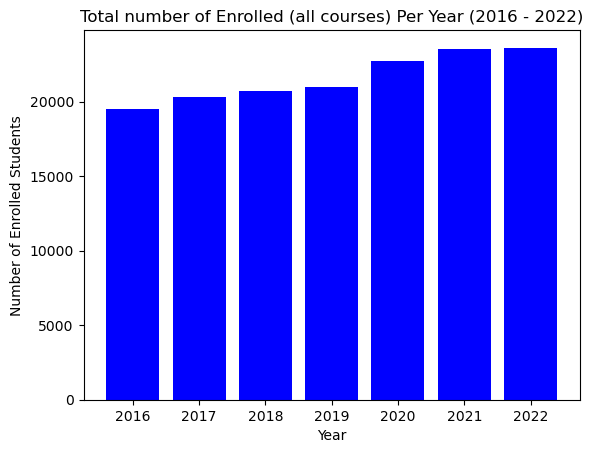

In [64]:
# General understanding of the number of graduates per year. We can notice an 
# increase over the years. Checked the total number of students per year.


enrolled_per_course_per_year = df4.groupby('Year')['Enrolled_total'].sum()


plt.bar(enrolled_per_course_per_year.index, enrolled_per_course_per_year.values, color='b')

plt.title('Total number of Enrolled (all courses) Per Year (2016 - 2022)')
plt.ylabel('Number of Enrolled Students')
plt.xlabel('Year')

# References:

# - https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023


Text(0.5, 0, 'Year')

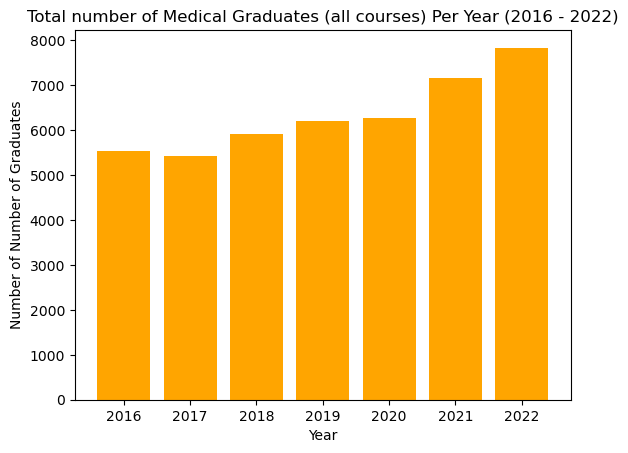

In [65]:
# General understanding of the number of graduates per year. We can notice an 
# increase over the years. Checked the total number of students per year.


graduates_per_course_per_year = df4.groupby('Year')['Graduates_total'].sum()


plt.bar(graduates_per_course_per_year.index, graduates_per_course_per_year.values, color='orange')

plt.title('Total number of Medical Graduates (all courses) Per Year (2016 - 2022)')
plt.ylabel('Number of Number of Graduates')
plt.xlabel('Year')

# References:

# - https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023


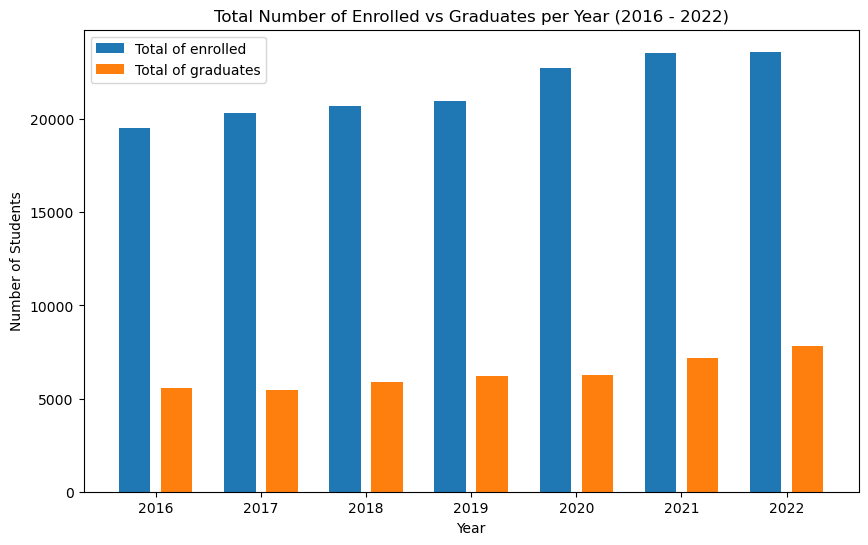

In [66]:
group_enrolledGrad = df4.groupby('Year').agg({'Enrolled_total':'sum', 'Graduates_total':'sum'}).reset_index()

plt.figure(figsize=(10,6))

plt.bar(group_enrolledGrad['Year'] - 0.2, group_enrolledGrad['Enrolled_total'],  label='Total of enrolled', width=0.3)
plt.bar(group_enrolledGrad['Year'] + 0.2, group_enrolledGrad['Graduates_total'],  label='Total of graduates', width=0.3)

plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Total Number of Enrolled vs Graduates per Year (2016 - 2022)')
plt.legend()
plt.show()


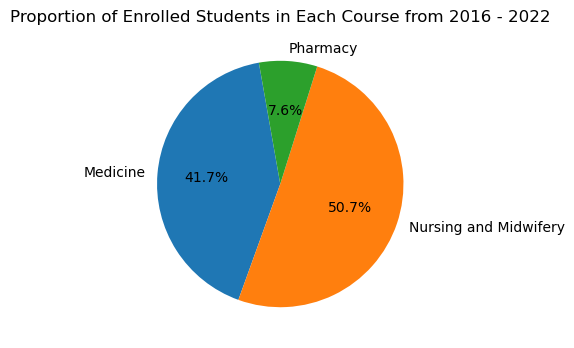

In [43]:
# Pie chart for degree proportions
course_proportions = df4.groupby('Course')['Enrolled_total'].sum()

plt.figure(figsize=(4, 4))

plt.title('Proportion of Enrolled Students in Each Course from 2016 - 2022')
plt.pie(course_proportions, labels=course_proportions.index,startangle=100, autopct='%1.1f%%' )

plt.show()

# References:

# - https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html in matplotlib.org, 2023

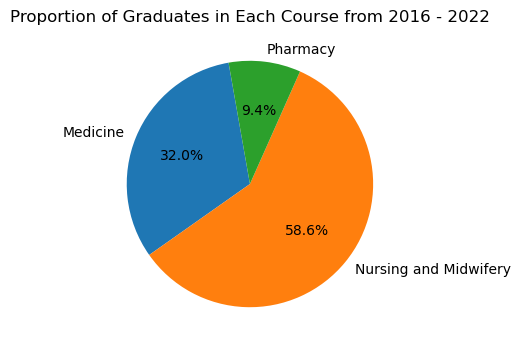

In [44]:
# Pie chart for degree proportions
course_proportions = df4.groupby('Course')['Graduates_total'].sum()

plt.figure(figsize=(4, 4))

plt.title('Proportion of Graduates in Each Course from 2016 - 2022')
plt.pie(course_proportions, labels=course_proportions.index,startangle=100, autopct='%1.1f%%' )

plt.show()

# References:

# - https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html in matplotlib.org, 2023

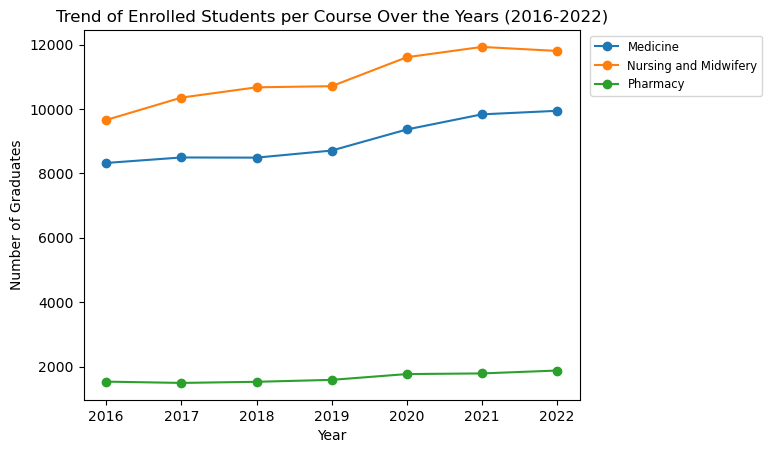

In [67]:
# Line graph: Vizualisation of the trend of medical graduates over the years per each degree
# The line graph for each individual was ploted by grouping course by course. The colours were set as default
# match the previous charts.


medicine_line = df4[df4['Course'] == 'Medicine']
plt.plot(medicine_line['Year'], medicine_line['Enrolled_total'], label='Medicine', marker='o')

nursing_midwifery_line = df4[df4['Course'] == 'Nursing and Midwifery']
plt.plot(nursing_midwifery_line['Year'], nursing_midwifery_line['Enrolled_total'], label='Nursing and Midwifery', marker='o')

pharmaceutical_line = df4[df4['Course'] == 'Pharmacy']
plt.plot(pharmaceutical_line['Year'], pharmaceutical_line['Enrolled_total'], label='Pharmacy', marker='o')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Trend of Enrolled Students per Course Over the Years (2016-2022)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize='small') # Here I adjusted the legend since it couldn't fit inside the chart.
plt.show()


#References:

# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html in matplotlib.org, 2023

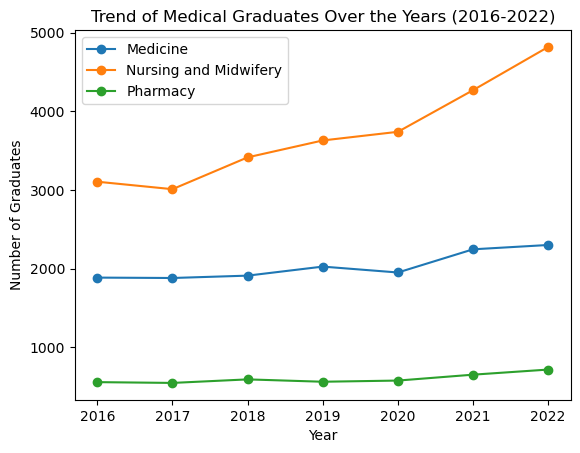

In [68]:
# Line graph: Vizualisation of the trend of medical graduates over the years per each degree
# The line graph for each individual was ploted by grouping course by course. The colours were set as default
# match the previous charts.


medicine_line = df4[df4['Course'] == 'Medicine']
plt.plot(medicine_line['Year'], medicine_line['Graduates_total'], label='Medicine', marker='o')

nursing_midwifery_line = df4[df4['Course'] == 'Nursing and Midwifery']
plt.plot(nursing_midwifery_line['Year'], nursing_midwifery_line['Graduates_total'], label='Nursing and Midwifery', marker='o')

pharmaceutical_line = df4[df4['Course'] == 'Pharmacy']
plt.plot(pharmaceutical_line['Year'], pharmaceutical_line['Graduates_total'], label='Pharmacy', marker='o')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Trend of Medical Graduates Over the Years (2016-2022)')
plt.legend()
plt.show()


#References:

# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html in matplotlib.org, 2023

/var/folders/7d/lmkwnvvj31n309c4kr4qtgtc0000gn/T/ipykernel_1164/835178713.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_stack_grads = df4.pivot_table(index='Year', columns='Course', values='Enrolled_total', aggfunc=sum)


<Figure size 1000x600 with 0 Axes>

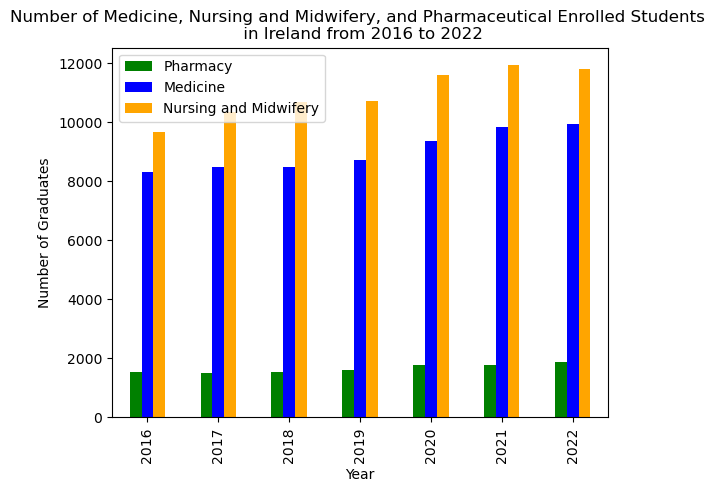

In [72]:
# Here I created a stacked bar for comparing the total number of students, per degree for each year. 

# Create a new DataFrame with the desired columns
df_stack_grads = df4.pivot_table(index='Year', columns='Course', values='Enrolled_total', aggfunc=sum)

# Reorder the columns in the desired sequence
df_stack_grads = df_stack_grads.reindex(columns=['Pharmacy', 'Medicine', 'Nursing and Midwifery'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
df_stack_grads.plot(kind='bar', stacked=False, color=['green', 'blue', 'orange'])
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Number of Medicine, Nursing and Midwifery, and Pharmaceutical Enrolled Students \n in Ireland from 2016 to 2022')
plt.legend()
plt.show()

# I modified the stacked parameter from 'True' to 'False' in order to have a better visualization when
# breaking the data down by degree.

# References:

# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

/var/folders/7d/lmkwnvvj31n309c4kr4qtgtc0000gn/T/ipykernel_1164/1452116556.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_stack_grads = df4.pivot_table(index='Year', columns='Course', values='Graduates_total', aggfunc=sum)


<Figure size 1000x600 with 0 Axes>

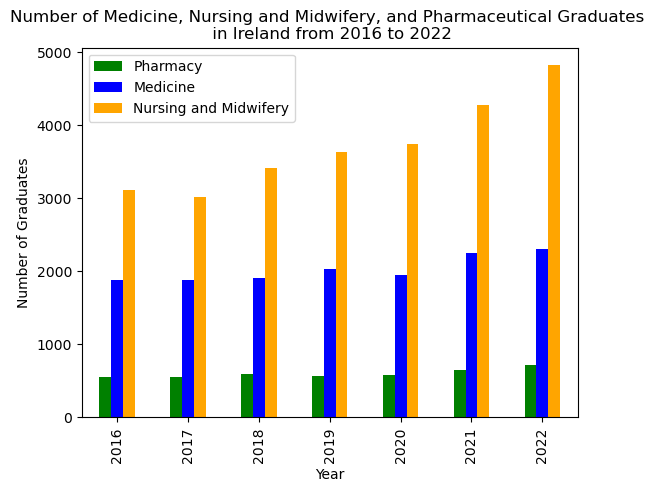

In [71]:
# Here I created a stacked bar for comparing the total number of students, per degree for each year. 

# Create a new DataFrame with the desired columns
df_stack_grads = df4.pivot_table(index='Year', columns='Course', values='Graduates_total', aggfunc=sum)

# Reorder the columns in the desired sequence
df_stack_grads = df_stack_grads.reindex(columns=['Pharmacy', 'Medicine', 'Nursing and Midwifery'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
df_stack_grads.plot(kind='bar', stacked=False, color=['green', 'blue', 'orange'])
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Number of Medicine, Nursing and Midwifery, and Pharmaceutical Graduates \n in Ireland from 2016 to 2022')
plt.legend()
plt.show()

# I modified the stacked parameter from 'True' to 'False' in order to have a better visualization when
# breaking the data down by degree.

# References:

# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

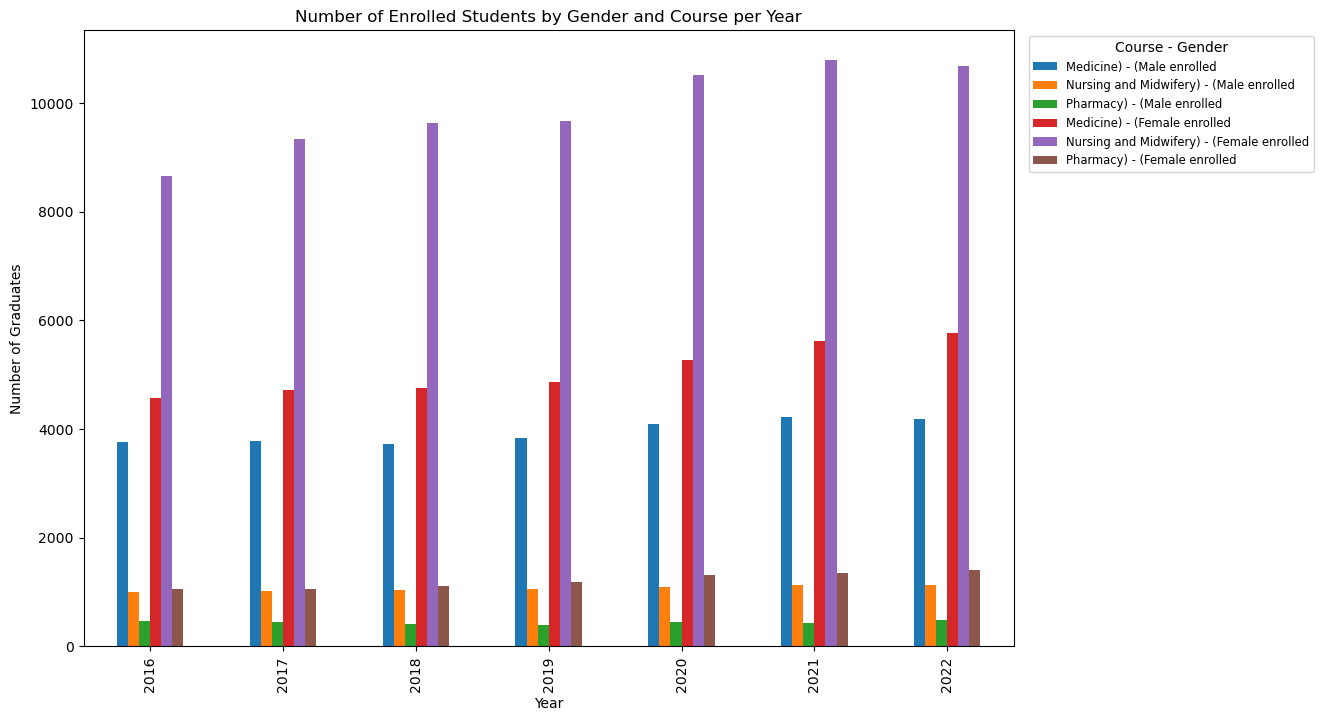

In [75]:
# Here I am ploting the distribution of graduates by gender and course per year.
# The data was grouped by year and course. Then summed up the graduates for each course.

grouped = df4.groupby(['Year', 'Course']).sum().reset_index()

# Create a pivot table for plotting
pivot_data = grouped.pivot(index='Year', columns='Course', values=['Male enrolled', 'Female enrolled'])

pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Number of Enrolled Students by Gender and Course per Year')

# Adjusting the legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [f"{label.split(', ')[1]} - {label.split(', ')[0]}" for label in labels]
plt.legend(handles, new_labels, title='Course - Gender', bbox_to_anchor=(1.01, 1), loc='upper left',fontsize='small')


plt.show()

#Complementary colours were used for better vizualisation.

# References:

# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html in pandas.pydata.org, 2003
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

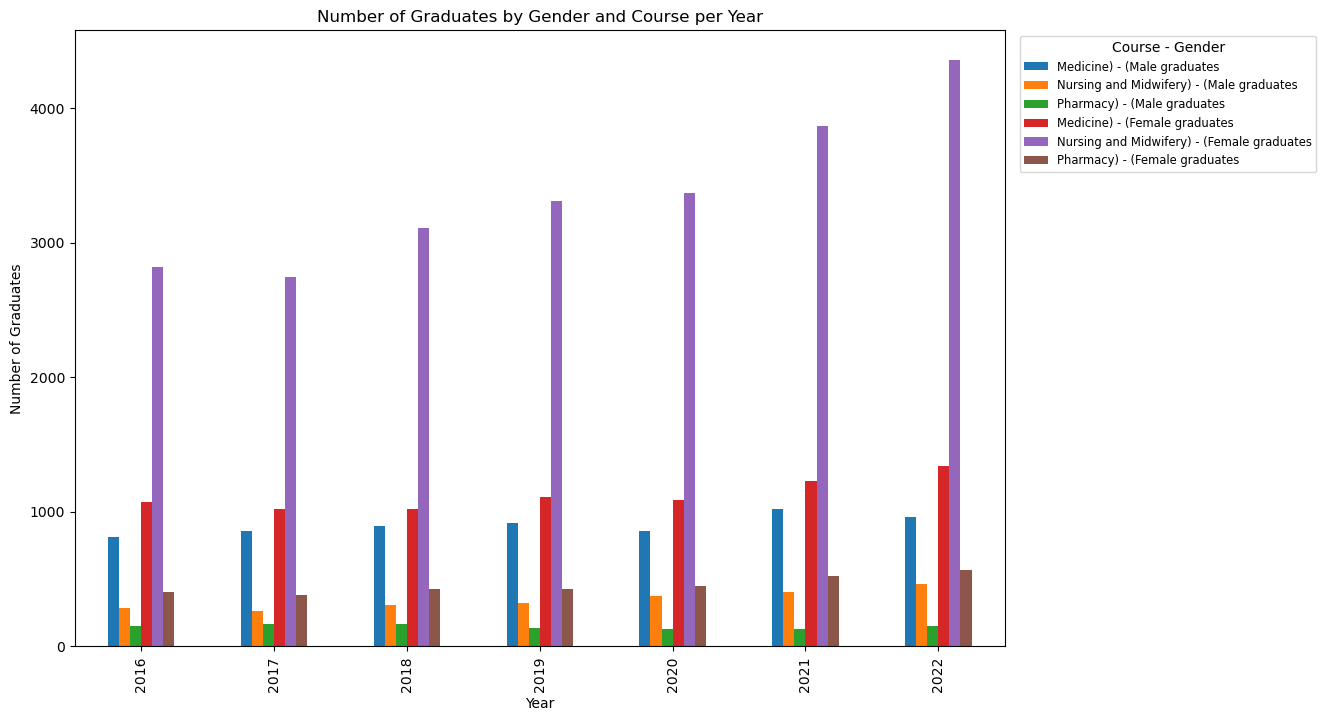

In [73]:
# Here I am ploting the distribution of graduates by gender and course per year.
# The data was grouped by year and course. Then summed up the graduates for each course.

grouped = df4.groupby(['Year', 'Course']).sum().reset_index()

# Create a pivot table for plotting
pivot_data = grouped.pivot(index='Year', columns='Course', values=['Male graduates', 'Female graduates'])

pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Number of Graduates by Gender and Course per Year')

# Adjusting the legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [f"{label.split(', ')[1]} - {label.split(', ')[0]}" for label in labels]
plt.legend(handles, new_labels, title='Course - Gender', bbox_to_anchor=(1.01, 1), loc='upper left',fontsize='small')


plt.show()

#Complementary colours were used for better vizualisation.

# References:

# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html in pandas.pydata.org, 2003
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

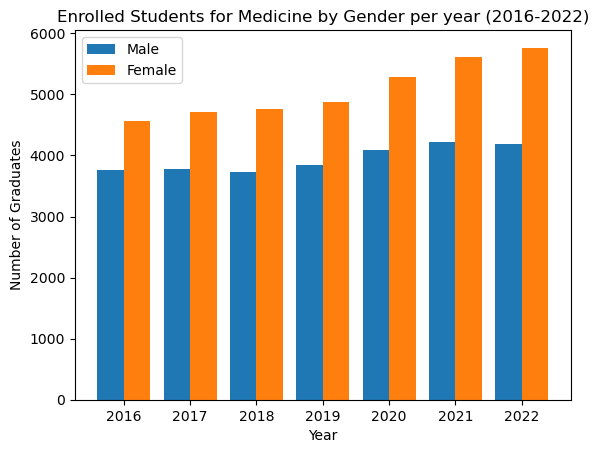

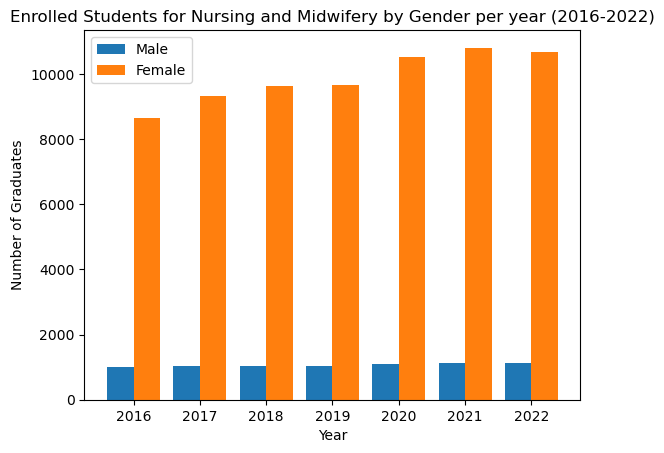

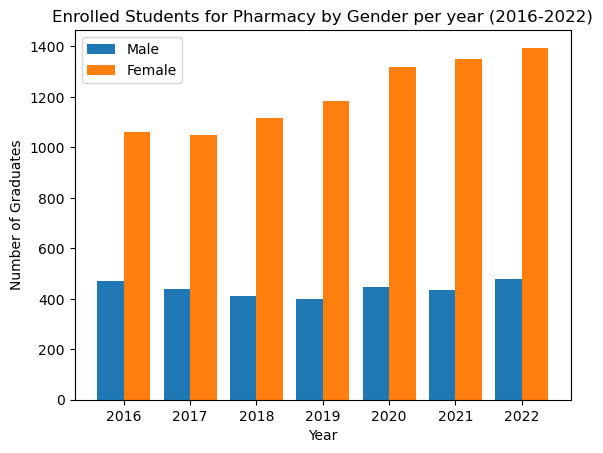

In [76]:
# For a more detailed vizualization and separating gender per course, a for loop was used for iterating over
# each unique value in the column 'Course'.

for course in df4['Course'].unique():
    course_data = df4[df4['Course'] == course]
    plt.bar(course_data['Year'] - 0.2, course_data['Male enrolled'], width=0.4, label='Male')
    plt.bar(course_data['Year'] + 0.2, course_data['Female enrolled'], width=0.4, label='Female')
    
    plt.title(f'Enrolled Students for {course} by Gender per year (2016-2022)')
    plt.xlabel('Year')
    plt.ylabel('Number of Graduates')
    plt.legend()
    plt.show()
    
# References:

# - https://docs.python.org/3/reference/compound_stmts.html#the-for-statement in pandas.pydata.org, 2003
# - https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

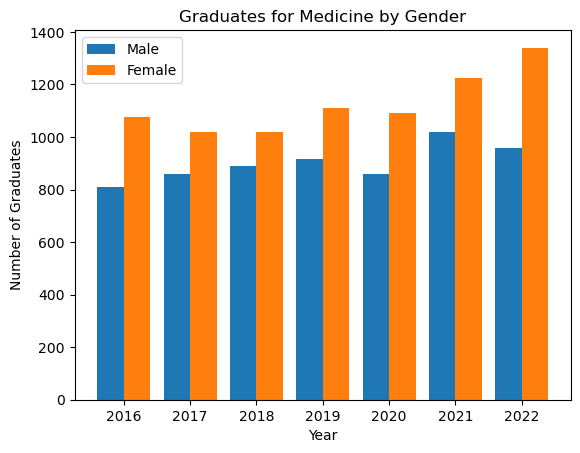

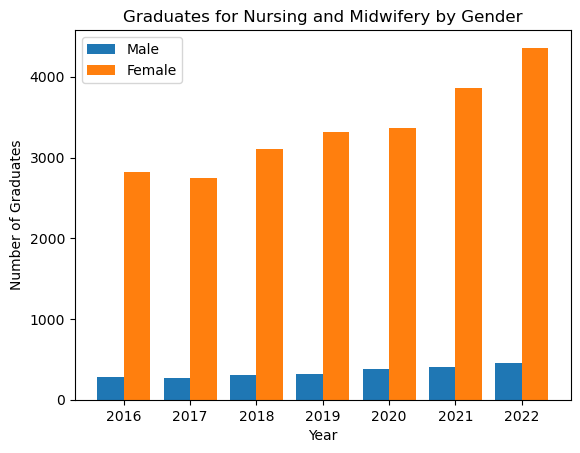

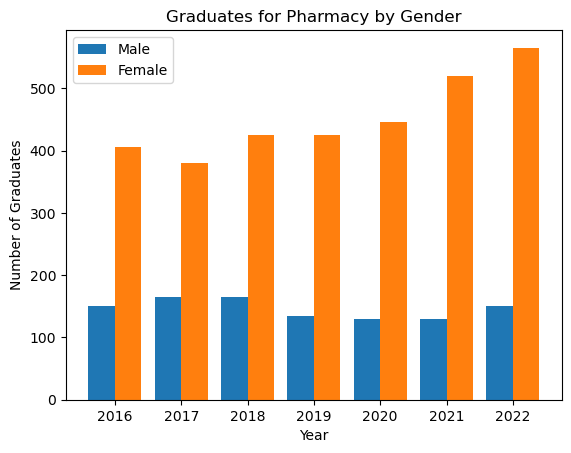

In [49]:
# For a more detailed vizualization and separating gender per course, a for loop was used for iterating over
# each unique value in the column 'Course'.

for course in df4['Course'].unique():
    course_data = df4[df4['Course'] == course]
    plt.bar(course_data['Year'] - 0.2, course_data['Male graduates'], width=0.4, label='Male')
    plt.bar(course_data['Year'] + 0.2, course_data['Female graduates'], width=0.4, label='Female')
    
    plt.title(f'Graduates for {course} by Gender per year (2016-2022)')
    plt.xlabel('Year')
    plt.ylabel('Number of Graduates')
    plt.legend()
    plt.show()
    
# References:

# - https://docs.python.org/3/reference/compound_stmts.html#the-for-statement in pandas.pydata.org, 2003
# - https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html in pandas.pydata.org, 2003
# - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html in matplotlib.org, 2023

# 2- Statistical analysis

In [50]:
# In the next few lines, I applyed some basic descriptive statistics, grouping data by 
# gender for enrolled and gradutes, for a individualized vizualisation.

group_year_course_grad =df4.groupby(['Year', 'Course', 'Graduates_total']).describe()
group_year_course_enro =df4.groupby(['Year', 'Course', 'Enrolled_total']).describe()


In [51]:
df4.describe()

,Year,Male enrolled,Female enrolled,Enrolled_total,Male graduates,Female graduates,Graduates_total
count,21.00000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2019.00000,1815.000000,5397.619048,7212.619048,464.761905,1648.333333,2113.095238
std,2.04939,1567.309797,3678.127111,4154.402971,332.281794,1317.359417,1355.074238
min,2016.00000,400.000000,1050.000000,1490.000000,130.000000,380.000000,545.000000
25%,2017.00000,470.000000,1350.000000,1785.000000,165.000000,520.000000,650.000000
50%,2019.00000,1045.000000,4870.000000,8710.000000,320.000000,1090.000000,1950.000000
75%,2021.00000,3755.000000,9335.000000,10355.000000,860.000000,2820.000000,3105.000000
max,2022.00000,4220.000000,10805.000000,11930.000000,1020.000000,4360.000000,4820.000000


In [52]:
# Grouping Female / Male gradutes and Female / Male enrolled

group_F_grads = df4.groupby(['Year', 'Course'])['Female graduates'].sum()

group_M_grads = df4.groupby(['Year', 'Course'])['Male graduates'].sum()

group_F_enrolled = df4.groupby(['Year', 'Course'])['Female enrolled'].sum()

group_M_enrolled = df4.groupby(['Year', 'Course'])['Male enrolled'].sum()
 

In [53]:
group_F_grads.describe()

count      21.000000
mean     1648.333333
std      1317.359417
min       380.000000
25%       520.000000
50%      1090.000000
75%      2820.000000
max      4360.000000
Name: Female graduates, dtype: float64

In [54]:
group_M_grads.describe()

count      21.000000
mean      464.761905
std       332.281794
min       130.000000
25%       165.000000
50%       320.000000
75%       860.000000
max      1020.000000
Name: Male graduates, dtype: float64

In [55]:
group_F_enrolled.describe()

count       21.000000
mean      5397.619048
std       3678.127111
min       1050.000000
25%       1350.000000
50%       4870.000000
75%       9335.000000
max      10805.000000
Name: Female enrolled, dtype: float64

In [56]:
group_M_enrolled.describe()

count      21.000000
mean     1815.000000
std      1567.309797
min       400.000000
25%       470.000000
50%      1045.000000
75%      3755.000000
max      4220.000000
Name: Male enrolled, dtype: float64

Discriptive statistics for graduates

In [57]:
# Analysing central tendency: Here, I split the calculation to have access to the mean, median and standard 
# deviation for males and females graduates per course.

mean_MF_per_course = df4.groupby(['Course']).agg({
    'Male graduates': 'mean',
    'Female graduates': 'mean'
}).rename(columns={'Male graduates': 'Mean Male (graduates)', 'Female graduates': 'Mean Female (graduates)'})


mean_MF_per_course

,Mean Male (graduates),Mean Female (graduates)
Course,,
Medicine,902.142857,1125.714286
Nursing and Midwifery,345.714286,3367.142857
Pharmacy,146.428571,452.142857


In [58]:
median_MF_per_course = df4.groupby(['Course']).agg({
    'Male graduates': 'median',
    'Female graduates': 'median'
}).rename(columns={'Male graduates': 'Median Male (graduates)', 'Female graduates': 'Median Female (graduates)'})

median_MF_per_course

,Median Male (graduates),Median Female (graduates)
Course,,
Medicine,890.0,1090.0
Nursing and Midwifery,320.0,3310.0
Pharmacy,150.0,425.0


In [59]:
standard_MF_per_course = df4.groupby(['Course']).agg({
    'Male graduates': 'std',
    'Female graduates': 'std'
}).rename(columns={'Male graduates': 'StdDev Male (graduates)', 'Female graduates': 'StdDev Female (graduates)'})

standard_MF_per_course

,StdDev Male (graduates),StdDev Female (graduates)
Course,,
Medicine,70.229217,117.062254
Nursing and Midwifery,70.203785,576.200610
Pharmacy,15.197118,66.197756


Descriptive statistics fro enrolled students

In [60]:
# Here, I split the calculation to have access to the mean, median and standard 
# deviation for males and females enrolled per course.

mean_MF_per_course_enrolled = df4.groupby(['Course']).agg({
    'Male enrolled': 'mean',
    'Female enrolled': 'mean'
}).rename(columns={'Male enrolled': 'Mean Male (enrolled)', 'Female enrolled': 'Mean Female (enrolled)'})


mean_MF_per_course_enrolled


,Mean Male (enrolled),Mean Female (enrolled)
Course,,
Medicine,3941.428571,5082.142857
Nursing and Midwifery,1063.571429,9900.000000
Pharmacy,440.000000,1210.714286


In [61]:
# Here, I split the calculation to have access to the mean, median and standard 
# deviation for males and females enrolled per course.

median_MF_per_course_enrolled = df4.groupby(['Course']).agg({
    'Male enrolled': 'median',
    'Female enrolled': 'median'
}).rename(columns={'Male enrolled': 'Median Male (enrolled)', 'Female enrolled': 'Median Female (enrolled)'})


median_MF_per_course_enrolled
    

,Median Male (enrolled),Median Female (enrolled)
Course,,
Medicine,3840.0,4870.0
Nursing and Midwifery,1045.0,9665.0
Pharmacy,440.0,1185.0


In [62]:
standard_MF_per_course_enrolled = df4.groupby(['Course']).agg({
    'Male enrolled': 'std',
    'Female enrolled': 'std'
}).rename(columns={'Male enrolled': 'StdDev Male (enrolled)', 'Female graduates': 'StdDev Female (enrolled)'})

standard_MF_per_course_enrolled

,StdDev Male (enrolled),Female enrolled
Course,,
Medicine,212.499300,471.741959
Nursing and Midwifery,49.050508,796.403374
Pharmacy,29.011492,143.568467
